# Laboratorio 9. Convergencia de bisección.

Nombre: Simón Aparicio Bocanegra.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

El siguiente ejemplo nos muestra como podemos crear los graficos necesarios para analizar el método de bisección.

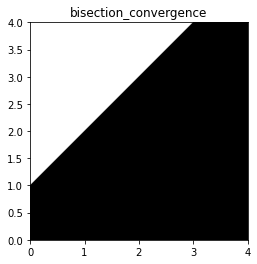

In [ ]:
extent = 0.0, 4.0, 0.0, 4.0 
   
width = 400
height= 400
pixels = np.full((width,height,3),0)
for i in range(width):
  for j in range(height):
    if (j>i+100): 
      pixels[height-j-1,i,0] = pixels[height-j-1,i,1] = pixels[height-j-1,i,2] = 255
      #print(i,j)

plt.title('bisection_convergence')
plt.imshow(pixels,extent = extent)
plt.show()

Podemos ahora definir `func(x)` como $f(x)=(x-1)(x-2)(x-3)(x-4)$. Graficamos tambien la función en cuestion.

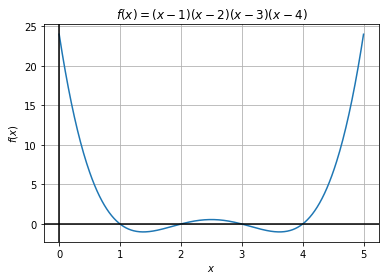

In [ ]:
def func(x): 
    return (x-1) *(x-2) *(x-3)*(x-4)


x = np.linspace(0.0,5.0,500)
fig, ax = plt.subplots()
ax.plot(x,func(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('$f(x)=(x-1)(x-2)(x-3)(x-4)$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show();


Realizemos ahora el gráfico del metodo, que para distintos valores de a y b nos muestra la divergencia o la convergencia del metodo a una de sus cuatro raices. 

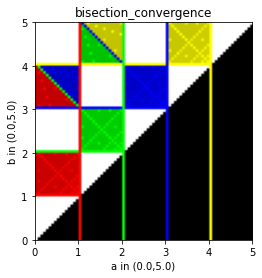

In [ ]:
width = height = 80
xi=0.0
xf=5.0
eps = 1e-3
mxiter = 1e4

pixels = np.full((width,height,3),0)
# roots
r1 = 1
r2 = 2
r3 = 3
r4 = 4
   
multcol = 5

for i in range(height):
            
    aa =   float(xi + (i * (xf-xi) /height))
    
    for j in range(width):
        bb= float(xi + (j* (xf-xi)/ width))

        a = aa
        b = bb
        c=a
        iter = 0
        
        while ((b-a) >= eps and (func(a) * func(b) <= 0)): 
            
            # Check if a is root 
            if (func(a) == 0.0): 
                c=a
                break

            # Check if b is root 
            if (func(b) == 0.0): 
                c=b
                break

            # Find middle point 
            c = (a+b)/2

            # Decide the side to repeat the steps 
            if (func(c)*func(a) < 0): 
                b = c 
            else: 
                a = c 
            
            iter = iter + 1
            
            if (iter > mxiter):
                break

        # Pixels colored using the roots
        if abs(c-r1)<eps:
            # color red
            pixels[height-j-1,i] = (255 - iter*multcol, 0, 0)
        elif abs(c-r2)<=eps:
            # color green
            pixels[height-j-1,i] = (0, 255 - iter*multcol, 0)
        elif abs(c-r3)<=eps:
            # color blue
            pixels[height-j-1,i] = (0, 0, 255 - iter*multcol)
        elif abs(c-r4)<=eps:
            # color yellow
            pixels[height-j-1,i] = (255 - iter*multcol, 255 - iter*multcol, 0)
        elif (b < a):
            pixels[height-j-1,i] = (0, 0, 0)
        elif (func(a) * func(b) >= 0):
            pixels[height-j-1,i] = (255, 255, 255)
        else:   
            pixels[height-j-1,i] = (0, 0, 0)

                
     
plt.title('bisection_convergence')
plt.xlabel("a in ("+str(xi)+","+str(xf)+")")
plt.ylabel("b in ("+str(xi)+","+str(xf)+")")
extent = xi, xf, xi, xf
plt.imshow(pixels,extent =extent)
plt.show()

 En el grafico podemos observar varias zonas, empezemos por la zona negra, que representa el conjunto de valores para los cuales a>b, una situación que viola una condición incial del método. Así mismo, las zonas blancas son las zonas para las cuales a y b tiene el mismo signo, es decir, que no existe un cambio de signo aparente en ese rango, por ejemplo, si tomamos dos valores menores a 1 o mayores a 4, ambos valores serán positivos y por lo tanto la el metodo no converge, o no cumple las condiciones para empezar la iteración, esto mismos ocurre para los siguiente rangos:

* ($a < b < 1$)
* $1 < a < b < 2$
* $2 < a < b < 3$
* $3 < a < b < 4$
* $(4 < a < b)$

Algunos rangos dentro los cuales a pesar de existir cambios de signos los valores f(a) y f(b) tienen el mismo signo son:

* $a < 1 \wedge b>4$
* $1 < a < 2 \wedge 3 < b < 4$
* $2 < a < 3 \wedge b > 4$

Ahora el resto de zonas está coloreado según el valor al cual convergen siguiendo:

* Rojo: $x = 1$
* Verde: $x = 2$
* Azul: $x = 3$
* Amarillo: $x = 4$

El color es mas claro si se converge más rápido.

Para el rango [0,5) observamos que por la manera en que está estructurado el código si el valor de a corresponde con el valor de una raiz, aún cuando a > b, el método converge y vemos las lineas verticales para cada una de las raices, lineas horizontales similares aparecen solo que esta vez solo para valores donde a < b. Ahora podemos identificar 4 zonas claramente coloreadas que convergen a las 4 distintas raices:

* $a \le 1 \wedge 1 \le b < 2$ converge a $x=1$
* $1 < a \le 2 \wedge 2 \le b < 3$ converge a $x=2$
* $2 < a \le 3 \wedge 3 \le b < 4$ converge a $x=3$
* $3 < a \le 4 \wedge b \geq 4$ converge a $x=4$

Quedan entonces dos grandes zonas que parecen no converger a un única raiz. Podemos ver mejor este fenomeno en la siguiente gráfica.

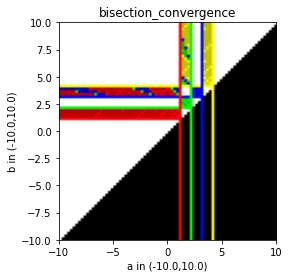

In [ ]:
width = height = 80
xi=-10.0
xf=10.0
eps = 1e-3
mxiter = 1e4

pixels = np.full((width,height,3),0)
# roots
r1 = 1
r2 = 2
r3 = 3
r4 = 4
   
multcol = 5

for i in range(height):
            
    aa =   float(xi + (i * (xf-xi) /height))
    
    for j in range(width):
        bb= float(xi + (j* (xf-xi)/ width))

        a = aa
        b = bb
        c=a
        iter = 0
        
        while ((b-a) >= eps and (func(a) * func(b) <= 0)): 
            
            # Check if a is root 
            if (func(a) == 0.0): 
                c=a
                break

            # Check if b is root 
            if (func(b) == 0.0): 
                c=b
                break

            # Find middle point 
            c = (a+b)/2

            # Decide the side to repeat the steps 
            if (func(c)*func(a) < 0): 
                b = c 
            else: 
                a = c 
            
            iter = iter + 1
            
            if (iter > mxiter):
                break

        # Pixels colored using the roots
        if abs(c-r1)<eps:
            # color red
            pixels[height-j-1,i] = (255 - iter*multcol, 0, 0)
        elif abs(c-r2)<=eps:
            # color green
            pixels[height-j-1,i] = (0, 255 - iter*multcol, 0)
        elif abs(c-r3)<=eps:
            # color blue
            pixels[height-j-1,i] = (0, 0, 255 - iter*multcol)
        elif abs(c-r4)<=eps:
            # color yellow
            pixels[height-j-1,i] = (255 - iter*multcol, 255 - iter*multcol, 0)
        elif (b < a):
            pixels[height-j-1,i] = (0, 0, 0)
        elif (func(a) * func(b) >= 0):
            pixels[height-j-1,i] = (255, 255, 255)
        else:   
            pixels[height-j-1,i] = (0, 0, 0)

                
     
plt.title('bisection_convergence')
plt.xlabel("a in ("+str(xi)+","+str(xf)+")")
plt.ylabel("b in ("+str(xi)+","+str(xf)+")")
extent = xi, xf, xi, xf
plt.imshow(pixels,extent =extent)
plt.show()

Los rangos de estas zonas son:

* $a < 0 \wedge 3 < b < 4$
* $1 < a < 2 \wedge b > 4$